In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
file_path = 'C:/Users/i/Desktop/2020빅콘테스트 문제데이터(혁신아이디어분야)/04_유통데이터(GS리테일)/'
file_name = '04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터.xlsx'
GS_retail_df = pd.read_excel(file_path+file_name,sheet_name='종합테이블(TB_DD_STR_PURCH_CLS)')

In [11]:
d_sooseong = GS_retail_df[GS_retail_df.BOR=='수성구']
d_sooseong.head(3)

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
0,20190201,대구광역시,수성구,고산1동,1.064336,0.450848,0.172221,0.295458,0.023263,0.044679,0.005075,0.004820,0.003637
1,20190201,대구광역시,수성구,고산2동,1.076418,0.457937,0.196274,0.295564,0.005521,0.034056,0.000844,0.008893,0.000913
2,20190201,대구광역시,수성구,고산3동,0.856071,0.359978,0.196602,0.376762,0.013408,0.029606,0.009117,0.008831,0.005697


In [12]:
d_sooseong_piv = d_sooseong.pivot_table(('LCLS_10_P','LCLS_20_P','LCLS_30_P','LCLS_40_P','LCLS_50_P','LCLS_60_P','LCLS_70_P','LCLS_80_P'),index='OPER_DT',aggfunc='mean')
d_sooseong_piv.columns=['식사','간식','마실거리','홈&리빙','헬스&뷰티','취미&여가','사회활동','임신/육아']
d_sooseong_19= d_sooseong_piv.iloc[:120]
d_sooseong_20= d_sooseong_piv.iloc[120:]
d_sooseong_19.index=d_sooseong_19.index.astype('str')
d_sooseong_20.index=d_sooseong_20.index.astype('str')
d_sooseong_19.index=map(lambda x:x[4:],d_sooseong_19.index)
d_sooseong_20.index=map(lambda x:x[4:],d_sooseong_20.index)

In [17]:
d_sooseong_19_week = d_sooseong_19.iloc[3::7].copy()
d_sooseong_20_week = d_sooseong_20.iloc[2::7].copy()

for i in range(len(d_sooseong_19_week)):
    for j in range(len(d_sooseong_19_week.columns)):
        key = d_sooseong_19_week.columns[j]
        d_sooseong_19_week[key].iloc[i]=d_sooseong_19[key].iloc[i*7+3:i*7+10].copy().mean()
        d_sooseong_20_week[key].iloc[i]=d_sooseong_20[key].iloc[i*7+3:i*7+10].copy().mean()

#d_sooseong_19_week.index = map(lambda x : x[5:],d_sooseong_19_week.index)
d_sooseong_20_week.index = d_sooseong_19_week.index



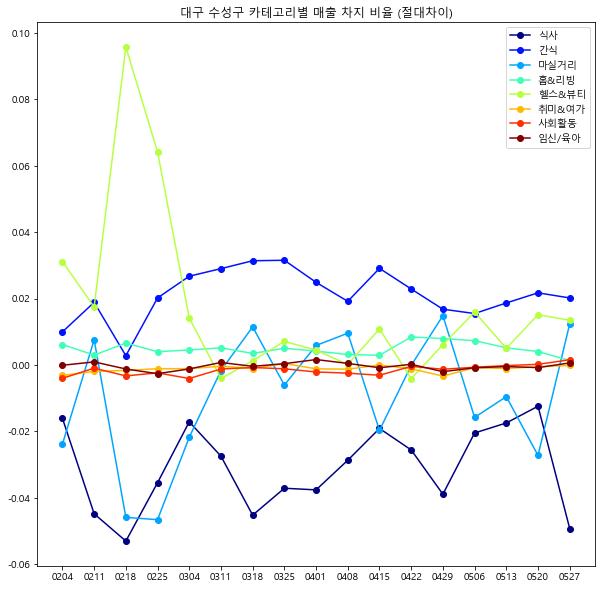

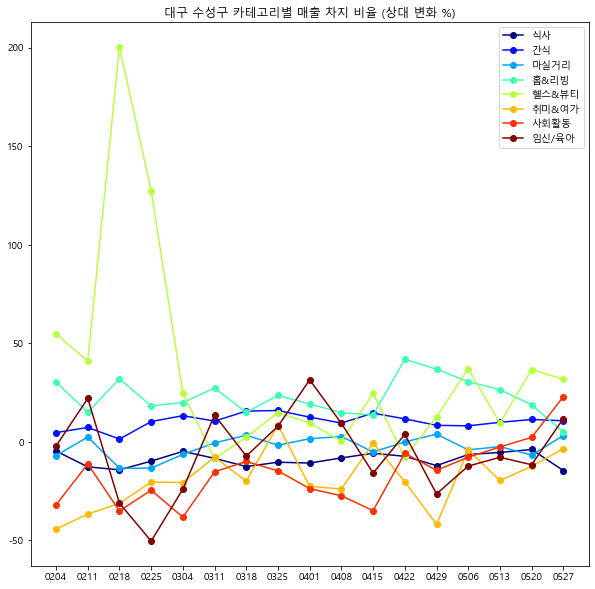

In [22]:
colors = plt.cm.jet(np.linspace(0,1,len(d_sooseong_19_week.columns)))

d_sooseong_diff = (d_sooseong_20_week-d_sooseong_19_week).copy()
plt.figure(figsize=(10,10))
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
for i in range(len(d_sooseong_diff.columns)):
    col= d_sooseong_diff.columns[i]
    plt.plot(d_sooseong_diff[col],marker='o',color=colors[i])
plt.title('대구 수성구 카테고리별 매출 차지 비율 (절대차이)')
plt.legend(d_sooseong_diff.columns)
plt.savefig('GS리테일_대구_수성구_증감_절대.png',dpi=300,edgecolor='black')


d_sooseong_diff = (d_sooseong_diff/d_sooseong_19_week)*100
plt.figure(figsize=(10,10))
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
for i in range(len(d_sooseong_diff.columns)):
    col= d_sooseong_diff.columns[i]
    plt.plot(d_sooseong_diff[col],marker='o',color=colors[i])
plt.title('대구 수성구 카테고리별 매출 차지 비율 (상대 변화 %)')
plt.legend(d_sooseong_diff.columns)
plt.savefig('GS리테일_대구_수성구_증감_상대.png',dpi=300,edgecolor='black')

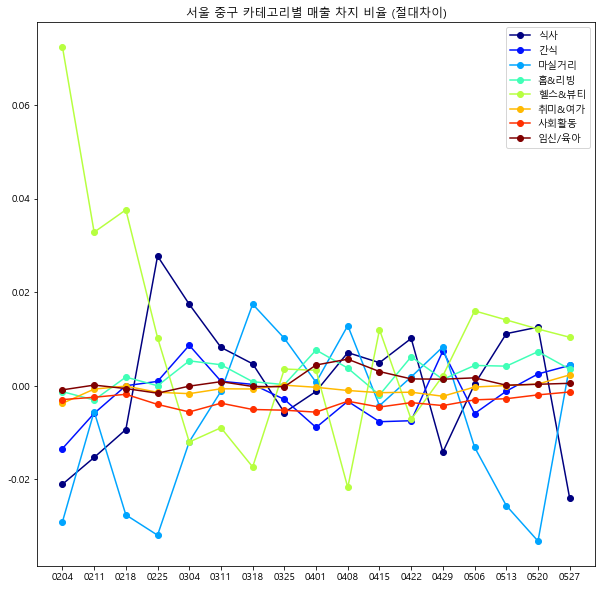

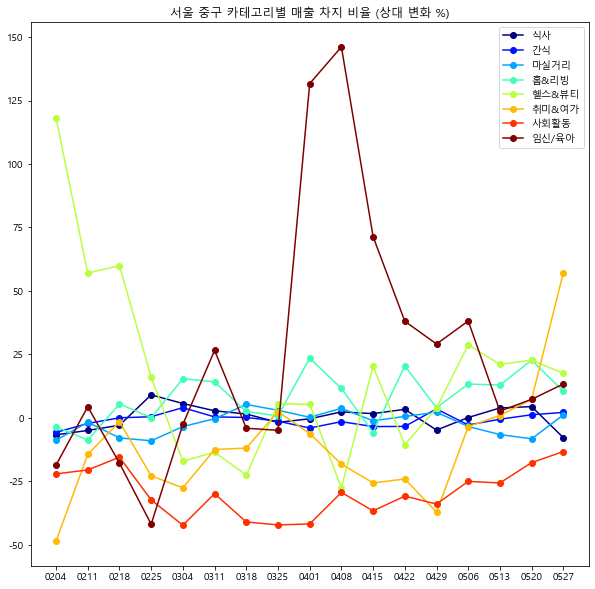

In [25]:
s_joongu = GS_retail_df[(GS_retail_df.PVN=='서울특별시')&(GS_retail_df.BOR=='중구')]
s_joongu_piv = s_joongu.pivot_table(('LCLS_10_P','LCLS_20_P','LCLS_30_P','LCLS_40_P','LCLS_50_P','LCLS_60_P','LCLS_70_P','LCLS_80_P'),index='OPER_DT',aggfunc='mean')
s_joongu_piv.columns=['식사','간식','마실거리','홈&리빙','헬스&뷰티','취미&여가','사회활동','임신/육아']
s_joongu_19= s_joongu_piv.iloc[:120]
s_joongu_20= s_joongu_piv.iloc[120:]
s_joongu_19.index=s_joongu_19.index.astype('str')
s_joongu_20.index=s_joongu_20.index.astype('str')
s_joongu_19.index=map(lambda x:x[4:],s_joongu_19.index)
s_joongu_20.index=map(lambda x:x[4:],s_joongu_20.index)
s_joongu_19_week = s_joongu_19.iloc[3::7].copy()
s_joongu_20_week = s_joongu_20.iloc[2::7].copy()

for i in range(len(s_joongu_19_week)):
    for j in range(len(s_joongu_19_week.columns)):
        key = s_joongu_19_week.columns[j]
        s_joongu_19_week[key].iloc[i]=s_joongu_19[key].iloc[i*7+3:i*7+10].copy().mean()
        s_joongu_20_week[key].iloc[i]=s_joongu_20[key].iloc[i*7+3:i*7+10].copy().mean()

#d_sooseong_19_week.index = map(lambda x : x[5:],d_sooseong_19_week.index)
s_joongu_20_week.index = s_joongu_19_week.index

colors = plt.cm.jet(np.linspace(0,1,len(s_joongu_19_week.columns)))

s_joongu_diff = (s_joongu_20_week-s_joongu_19_week).copy()
plt.figure(figsize=(10,10))
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
for i in range(len(s_joongu_diff.columns)):
    col= s_joongu_diff.columns[i]
    plt.plot(s_joongu_diff[col],marker='o',color=colors[i])
plt.title('서울 중구 카테고리별 매출 차지 비율 (절대차이)')
plt.legend(s_joongu_diff.columns)
plt.savefig('GS리테일_서울_중구_증감_절대.png',dpi=300,edgecolor='black')


s_joongu_diff = (s_joongu_diff/s_joongu_19_week)*100
plt.figure(figsize=(10,10))
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
for i in range(len(s_joongu_diff.columns)):
    col= s_joongu_diff.columns[i]
    plt.plot(s_joongu_diff[col],marker='o',color=colors[i])
plt.title('서울 중구 카테고리별 매출 차지 비율 (상대 변화 %)')
plt.legend(s_joongu_diff.columns)
plt.savefig('GS리테일_서울_중구_증감_상대.png',dpi=300,edgecolor='black')

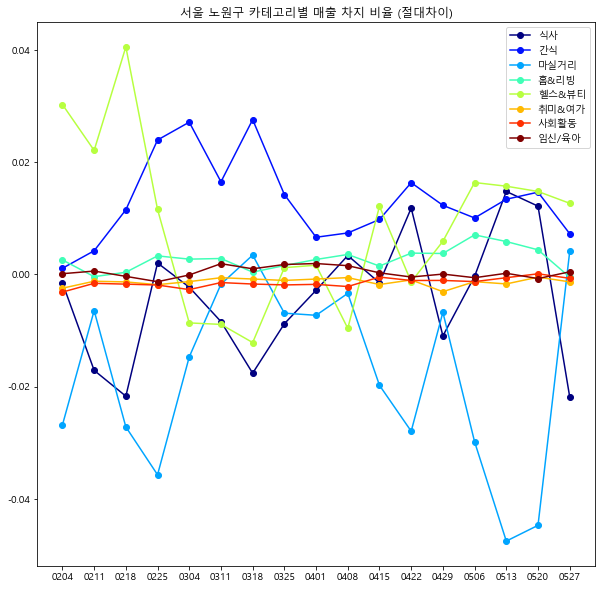

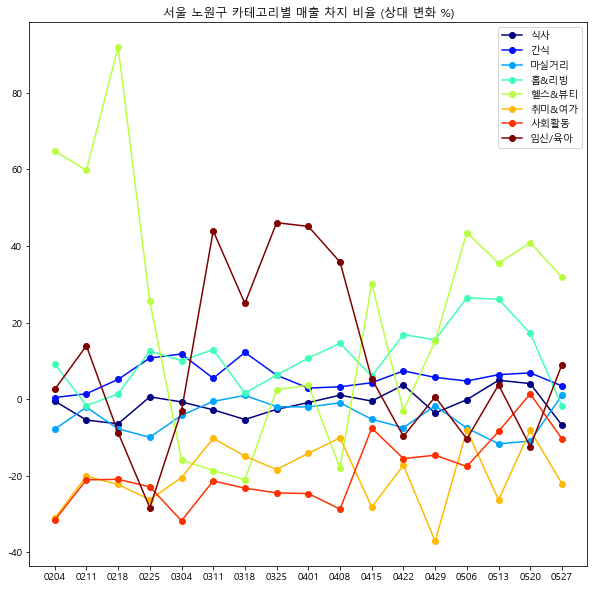

In [26]:
s_nowon = GS_retail_df[(GS_retail_df.PVN=='서울특별시')&(GS_retail_df.BOR=='노원구')]
s_nowon_piv = s_nowon.pivot_table(('LCLS_10_P','LCLS_20_P','LCLS_30_P','LCLS_40_P','LCLS_50_P','LCLS_60_P','LCLS_70_P','LCLS_80_P'),index='OPER_DT',aggfunc='mean')
s_nowon_piv.columns=['식사','간식','마실거리','홈&리빙','헬스&뷰티','취미&여가','사회활동','임신/육아']
s_nowon_19= s_nowon_piv.iloc[:120]
s_nowon_20= s_nowon_piv.iloc[120:]
s_nowon_19.index=s_nowon_19.index.astype('str')
s_nowon_20.index=s_nowon_20.index.astype('str')
s_nowon_19.index=map(lambda x:x[4:],s_nowon_19.index)
s_nowon_20.index=map(lambda x:x[4:],s_nowon_20.index)
s_nowon_19_week = s_nowon_19.iloc[3::7].copy()
s_nowon_20_week = s_nowon_20.iloc[2::7].copy()

for i in range(len(s_nowon_19_week)):
    for j in range(len(s_nowon_19_week.columns)):
        key = s_nowon_19_week.columns[j]
        s_nowon_19_week[key].iloc[i]=s_nowon_19[key].iloc[i*7+3:i*7+10].copy().mean()
        s_nowon_20_week[key].iloc[i]=s_nowon_20[key].iloc[i*7+3:i*7+10].copy().mean()

#d_sooseong_19_week.index = map(lambda x : x[5:],d_sooseong_19_week.index)
s_nowon_20_week.index = s_nowon_19_week.index

colors = plt.cm.jet(np.linspace(0,1,len(s_nowon_19_week.columns)))

s_nowon_diff = (s_nowon_20_week-s_nowon_19_week).copy()
plt.figure(figsize=(10,10))
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
for i in range(len(s_nowon_diff.columns)):
    col= s_nowon_diff.columns[i]
    plt.plot(s_nowon_diff[col],marker='o',color=colors[i])
plt.title('서울 노원구 카테고리별 매출 차지 비율 (절대차이)')
plt.legend(s_nowon_diff.columns)
plt.savefig('GS리테일_서울_노원구_증감_절대.png',dpi=300,edgecolor='black')


s_nowon_diff = (s_nowon_diff/s_nowon_19_week)*100
plt.figure(figsize=(10,10))
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
for i in range(len(s_nowon_diff.columns)):
    col= s_nowon_diff.columns[i]
    plt.plot(s_nowon_diff[col],marker='o',color=colors[i])
plt.title('서울 노원구 카테고리별 매출 차지 비율 (상대 변화 %)')
plt.legend(s_nowon_diff.columns)
plt.savefig('GS리테일_서울_노원구_증감_상대.png',dpi=300,edgecolor='black')